# Task 2: kNN Classifier

### 1. Introduction & Objectives

In this task, we will process data and use a kNN Classifier on Breast Cancer Wisconsin (Diagnostic) Data Set. 

The dataset contains 569 instances of cancer biopsies, each with 30 features. The features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The dataset is available at the UCI Machine Learning Repository.

Our aim in this assignment is to learn about the usage of kNN algorithm with the aforementioned dataset, byt training our own classifier model by splitting the available data in to a training set  for a classifier, and using the rest of the data to test our trained classifier model. We will measure the classifiers accuracy, precision and recall by giving it a test group where we compare the verified data to the classifiers predictions.

The objectives of the assignment are:
1. To learn to use the kNN algorithm for classification problems
2. To learn to evaluate the performance of a classifier.

### 2. Data Understanding

The real data used in this assignment has been imported as pandas dataframes from the [UC Irvine machine learning repository](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic). The data features  569 instances of varying measurements and classifications for malignant and benign tumors with multiple measurements across 3 separating planes.  

The main differentiating values in this data are the classification of the tumours as either 'M' Malignant or 'B' Benign. This preperation of the targets allows us to plot the data in a manner that helps us visualize the data and understand the relationships between the features and the target variable.

Credit for the data goes to the creators:
* William Wolberg
* Olvi Mangasarian
* Nick Street
* W. Street

#### 2.1. Importing the Libraries and Loading the Dataset

Let's start by importing the necessary libraries and load the dataset.

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [199]:
# Load the dataset
data = fetch_ucirepo(id=17)

# Data (as pandas dataframes)
features = data.data.features
targets = data.data.targets

# We need to make copies of the, since the original data is read-only
features = features.copy()
targets = targets.copy()

#### 2.2. Summary of variables

Let's check the first few rows of the dataset to understand the variables and their types.

In [200]:
print("Features:")
features.head()

Features:


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [201]:
print("Targets:")
targets.head()

Targets:


,Diagnosis
0,M
1,M
2,M
3,M
4,M


As we can see, the dataset contains 30 features and 1 target variable. The target variable is a string variable with two classes: 'M' (Malignant) and 'B' (Benign). The features are as follows: radius, texture, perimeter, smoothness, compactnes, convacity, conclave_points, symmetry and fractal_dimension. All of the features are represented in numerical variables. The features are measured across three different sizes (1, 2, 3) providing a total of 30 features.

#### 2.3. Data Preprocessing

According to the UC Irvine Machine Learning Repository, the dataset is clean and does not contain any missing values, so we don't need to perform any data cleaning operations, but when handling data, it is always a good practice to check for missing values and handle them accordingly.

In [202]:
# Check for missing values
missing_values = features.isnull().sum()
missing_values

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

There are no missing values in the dataset, so we don't need to perform any data cleaning operations. We can proceed with the data preparation and model development steps.

### 3. Data Preparation

#### 3.1 Conversion of Target Variable

Let's convert the target variable to a binary variable. We will convert 'M' to 1 and 'B' to 0, so it can be used in the kNN classifier. After the conversion, we will check the results.

In [203]:
# Convert target variable to binary
targets["Diagnosis"] = [1 if x == 'M' else 0 for x in targets["Diagnosis"]]
targets.head()

,Diagnosis
0,1
1,1
2,1
3,1
4,1


The target variable has been successfully converted to a binary variable. The target variable now contains 1 for 'M' and 0 for 'B'.

#### 3.2 Standardization of Features

We will standardize the features so that they have a mean of 0 and a standard deviation of 1. This is important because the kNN algorithm is sensitive to the scale of the features. We will use the StandardScaler from the scikit-learn library to standardize the features.

In [204]:
# Standardize the features
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
features_scaled.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


The features have been successfully standardized. The features are now centered around 0 with a standard deviation of 1.

#### 3.3 Train-Test Split

We will split the data into a training set and a test set. We will use 80% of the data for training and 20% for testing. We will use the train_test_split function from the scikit-learn library to split the data.

In [205]:
features_train, features_test, targets_train, targets_test = train_test_split(features_scaled, targets, test_size=0.2, random_state=42)

The data has been successfully split into a training set and a test set. We will use the training set to train the kNN classifier and the test set to evaluate its performance.

#### 3.4 Evaluation Metrics

Let's visualize the date to understand what the data looks like.

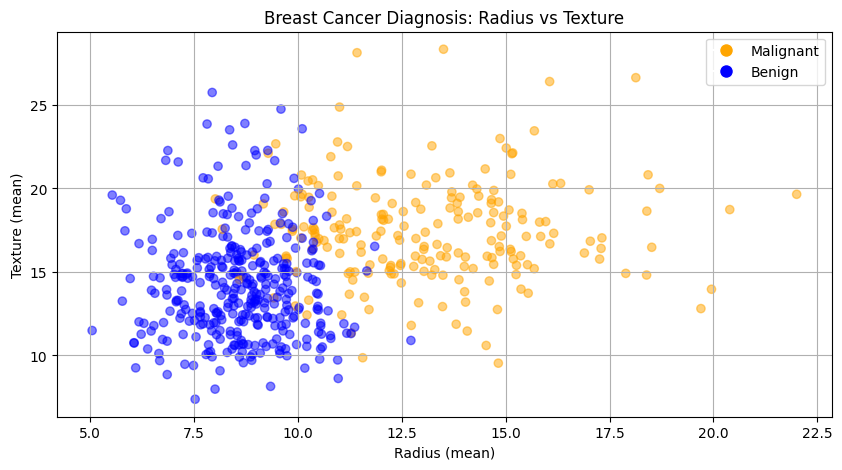

In [206]:
fig, ax = plt.subplots(figsize=(10, 5))

colors = targets["Diagnosis"].map({0: "blue", 1: "orange"})

radius_mean = (features["radius1"] + features["radius2"] + features["radius3"]) / 3
texture_mean = (features["texture1"] + features["texture2"] + features["texture3"]) / 3

plt.scatter(radius_mean, texture_mean, c=colors, alpha=0.5)
plt.title("Breast Cancer Diagnosis: Radius vs Texture")

plt.xlabel("Radius (mean)")
plt.ylabel("Texture (mean)")

plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Malignant', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Benign', markerfacecolor='blue', markersize=10)
])

plt.grid(True)

plt.show()

### 4. Model Development

#### 4.1 kNN Classifier

Now we will create three different kNN classifiers each with different values of k (5, 9, 16) and train them on the training set.

In [207]:
# Create kNN classifiers
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_9 = KNeighborsClassifier(n_neighbors=9)
knn_16 = KNeighborsClassifier(n_neighbors=16)

# Train the classifiers
knn_5.fit(features_train, targets_train["Diagnosis"])
knn_9.fit(features_train, targets_train["Diagnosis"])
knn_16.fit(features_train, targets_train["Diagnosis"])

KNeighborsClassifier(n_neighbors=16)

#### 4.2 Classifier Performance Evaluation

Let's evaluate the performance of the kNN classifiers using the test set. We will calculate the accuracy, precision, and recall of the classifiers.

In [208]:
# Predict the target values
predictions_5 = knn_5.predict(features_test)
predictions_9 = knn_9.predict(features_test)
predictions_16 = knn_16.predict(features_test)

# Calculate the evaluation metrics
accuracy_test_5 = accuracy_score(targets_test["Diagnosis"], predictions_5)
accuracy_test_9 = accuracy_score(targets_test["Diagnosis"], predictions_9)
accuracy_test_16 = accuracy_score(targets_test["Diagnosis"], predictions_16)

# Calculate the precision metrics
precision_test_5 = precision_score(targets_test["Diagnosis"], predictions_5)
precision_test_9 = precision_score(targets_test["Diagnosis"], predictions_9)
precision_test_16 = precision_score(targets_test["Diagnosis"], predictions_16)

# Calculate the recall metrics
recall_test_5 = recall_score(targets_test["Diagnosis"], predictions_5)
recall_test_9 = recall_score(targets_test["Diagnosis"], predictions_9)
recall_test_16 = recall_score(targets_test["Diagnosis"], predictions_16)

The performance of the kNN classifiers has been successfully evaluated. We have calculated the accuracy, precision, and recall of the classifiers for different values of k (5, 9, 16).

### 5. Results

#### 5.1 Performance of the kNN Classifiers

Let's visualize the performance of the kNN classifiers by plotting the accuracy, precision, and recall for each classifier into a line chart.

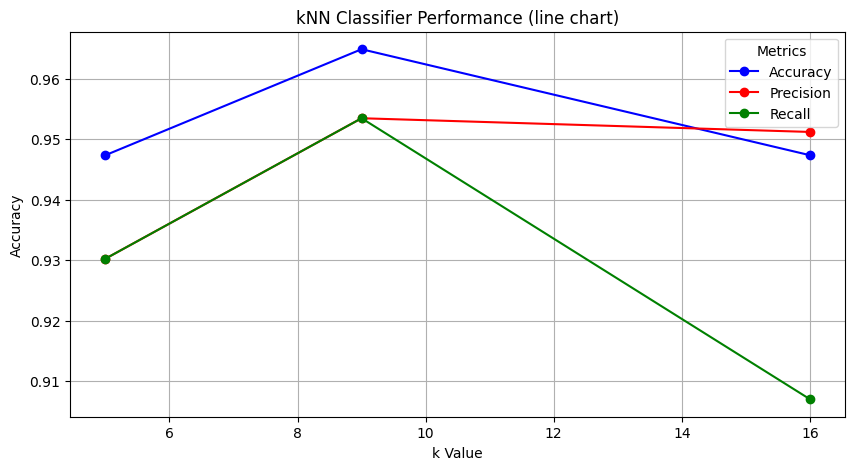

In [209]:
fig = plt.subplots(figsize=(10, 5))

k_values = [5, 9, 16]

accuracy_values = [accuracy_test_5, accuracy_test_9, accuracy_test_16]
plt.plot(k_values, accuracy_values, marker='o', color='b', label='Accuracy')

precision_values = [precision_test_5, precision_test_9, precision_test_16]
plt.plot(k_values, precision_values, marker='o', color='r', label='Precision')

recall_values = [recall_test_5, recall_test_9, recall_test_16]
plt.plot(k_values, recall_values, marker='o', color='g', label='Recall')

plt.title("kNN Classifier Performance (line chart)")
plt.xlabel("k Value")
plt.ylabel("Accuracy")

plt.grid(True)
plt.legend(title="Metrics")

plt.show()

The performance of the kNN classifiers has been successfully visualized in a line chart. The chart shows the accuracy, precision, and recall of the classifiers for different values of k (5, 9, 16), but there is an overlap in the lines. Let's visualize the performance of the kNN classifiers in a bar chart to make it more clear.

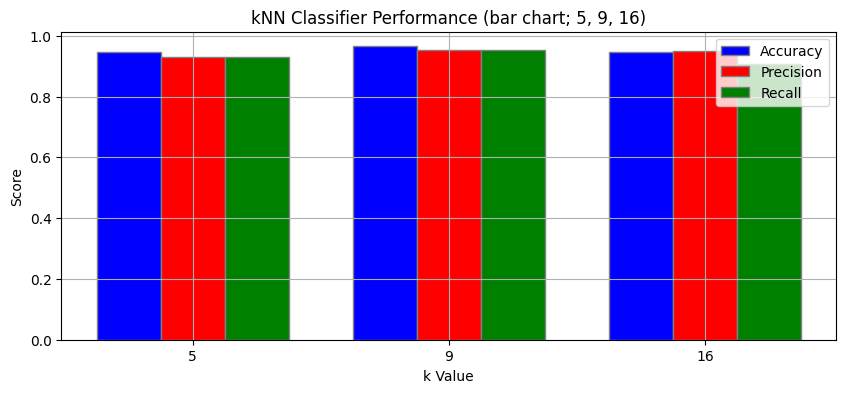

In [210]:
# Set the width of the bars
bar_width = 0.25

# Positions of the bars on the x-axis
r1 = np.arange(len(k_values))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 4))

# Create bars for each metric
ax.bar(r1, accuracy_values, color='b', width=bar_width, edgecolor='grey', label='Accuracy')
ax.bar(r2, precision_values, color='r', width=bar_width, edgecolor='grey', label='Precision')
ax.bar(r3, recall_values, color='g', width=bar_width, edgecolor='grey', label='Recall')

# Adding labels and title
plt.title("kNN Classifier Performance (bar chart; 5, 9, 16)")
plt.xlabel("k Value")
plt.ylabel("Score")
plt.xticks([r + bar_width for r in range(len(k_values))], k_values)

# Adding a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

The performance of the kNN classifiers has been successfully visualized in a bar chart. The chart shows the accuracy, precision, and recall of the classifiers for different values of k (5, 9, 16). The bar chart makes it easier to compare the performance of the classifiers for each metric.

#### 5.2 Confusion Matrix

Let's visualize the confusion matrix for the kNN classifier with the most precise value of k (k = 9).

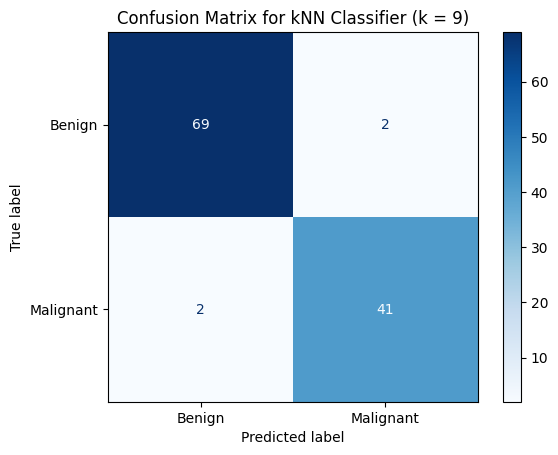

In [211]:
# Calculate the confusion matrix
conf_matrix_9 = confusion_matrix(targets_test["Diagnosis"], predictions_9)

cmd = ConfusionMatrixDisplay(conf_matrix_9, display_labels=['Benign', 'Malignant'])
cmd.plot(cmap='Blues')
plt.title("Confusion Matrix for kNN Classifier (k = 9)")
plt.show()

The confusion matrix concludes that: tp = 69, fp = 2, fn = 2, tn = 41. The classifier has a high precision and recall, with a low number of false positives and false negatives. The classifier has a high accuracy, precision, and recall, making it a good classifier for the given dataset.

### 6. Conclusion

In this task, we have successfully implemented a kNN classifier on the Breast Cancer Wisconsin (Diagnostic) Data Set. We have trained three different kNN classifiers with different values of k (5, 9, 16) and evaluated their performance using the test set. We have calculated the accuracy, precision, and recall of the classifiers and visualized their performance using line and bar charts. We have also visualized the confusion matrix for the kNN classifier with the most precise value of k (k = 9).

The kNN classifier has shown high accuracy, precision, and recall, making it a good classifier for the given dataset. The classifier has a low number of false positives and false negatives, indicating that it can effectively classify the data into the two classes (Benign and Malignant).

Overall, the kNN classifier has performed well on the Breast Cancer Wisconsin (Diagnostic) Data Set, demonstrating the effectiveness of the kNN algorithm for classification problems.